# TD Learning
## SARSA
   
Fabrice Mulotti

version 2

Licence MIT

In [21]:

import gymnasium as gym
import numpy as np

import matplotlib.pyplot as plt

***
## Créons et regardons les caractéristiques de notre environnement

In [22]:
env = gym.make("CliffWalking-v0",render_mode="ansi")
env.reset()

(36, {'prob': 1})

## Etat

In [23]:
env.observation_space.dtype

dtype('int64')

In [24]:
env.observation_space.n

48

In [25]:
env.observation_space.sample()

8

## Action

UP = 0   
RIGHT = 1   
DOWN = 2   
LEFT = 3   

In [26]:
env.action_space.n

4

In [27]:
env.action_space.sample()

2

In [28]:
action = ["up", "right", "down", "left"]

***
## Créons une politique e-greedy

In [29]:
def politique_egreedy(env,Q,s,epsilon):
    # en entrée : env=environnement, Q fonctions action valeur, s = état courant, epsilon= pour espilon-greedy
    r=np.random.uniform()
    if r<epsilon:
        return(env.action_space.sample())
    else:
        return(np.argmax(Q[s,]))
        # autre solution
        # listQ=[]
        #for a in range(env.action_space.n):
        #    listQ.append(Q[s,a])
        # return(np.argmax(listQ))
               

***
## Initialisation

![alt](static/sarsa.png)

## Définissons nos hyper paramètres et initialisons notre Tableau Q(s,a)

In [49]:
alpha=0.5   # learning rate
gamma=1.0   # part du futur
epsilon=0.1 # part de hasard
Q=np.zeros((env.observation_space.n,env.action_space.n))

In [50]:
Q.shape

(48, 4)

In [51]:
# Affiche de valeurs pendant l éxecution
verbose=0

# liste des valeurs pour créer un graphique 
histoRecompense=[]
histoLongueurEpisode=[]

# Nombre d'essai
max_iter=1000
for i in range(max_iter):
    S=env.reset()[0]

    done=False
    truncated=False
    cumulR=0 # cumul des récompenses par épisode
    cumulA=0 # cumul du nombre d'action = longueur des épisodes
    # Votre code : sélection de la premiere action A=....
    A=politique_egreedy(env,Q,S,epsilon)
    
    while not (done or truncated):
        # Votre code = environ 6 lignes de code
        # execution d'un step S_,R,done = ...
        # selection action suivante
        # ajustement de Q
        S_ , R, done, truncated, _ = env.step(A)
        A_=politique_egreedy(env,Q,S_,epsilon)

        Q[S,A] = Q[S,A] + alpha*(R+gamma*Q[S_,A_]-Q[S,A])
        # pour debug affichage
        if verbose :
            print(f"From S={S},A={action[A]} to S_={S_},A_={action[A_]} R={R}")
            if done:
                print("----------------------------------------------------")

        cumulR+=R
        cumulA+=1

        # Votre code : transition etat et action S=... A=...
        S=S_
        A=A_

    histoRecompense.append(cumulR)
    histoLongueurEpisode.append(cumulA)

In [52]:
Q.reshape(48,4)

array([[ -18.4397388 ,  -17.66597997,  -21.2747198 ,  -21.84432156],
       [ -19.9664581 ,  -16.00485971,  -19.10322571,  -18.56404607],
       [ -17.78350162,  -14.60503707,  -16.42253617,  -18.92034297],
       [ -15.73043183,  -12.79539076,  -15.33118772,  -17.10662318],
       [ -13.80417046,  -11.10263206,  -14.57560524,  -15.91568405],
       [ -12.93830699,   -9.65561686,  -13.47792403,  -15.01871398],
       [ -12.08658628,   -8.4233216 ,  -11.69881548,  -13.16101344],
       [ -11.84728907,   -7.25651014,  -11.89572873,  -12.29831046],
       [ -10.15898013,   -6.12500557,  -10.93117159,   -9.35787353],
       [  -6.53059968,   -5.04569108,   -9.00851246,  -10.01891337],
       [  -5.55977876,   -5.43799921,   -4.28273868,   -8.821405  ],
       [  -5.20279335,   -4.85445579,   -3.16994866,   -6.44668678],
       [ -20.42971975,  -17.5876353 ,  -21.83029328,  -20.96694462],
       [ -16.75167725,  -18.54351659,  -20.77993123,  -21.36129032],
       [ -14.55790782,  -17.790732

## Analyse graphique du résultat

/tmp/ipykernel_158685/2344350326.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


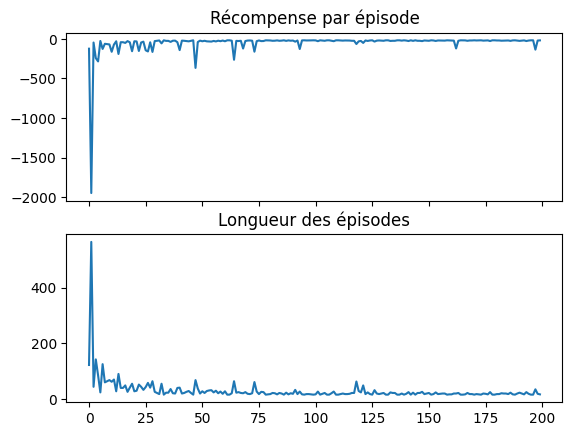

In [53]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)

ax1.set_title("Récompense par épisode")
ax2.set_title("Longueur des épisodes")

# fig.title("Récompenses cumulées par épisode")

ax2.plot(histoLongueurEpisode[0:200])
ax1.plot(histoRecompense[0:200])
fig.show()


In [15]:
## Essayons une simulation

In [16]:
S=env.reset()[0]
done=False
visuel=np.zeros((env.observation_space.n))

while not (done or truncated):
    A=politique_egreedy(env,Q,S,0)
    visuel[S]=1
    S_,R_,done,truncated,_=env.step(A)
    # env.render()
    S=S_
    
visuel[36]=5
visuel[47]=8
print("Les 1 indique le passage de notre robot (0 dans les autres cas)")
print(" ")
print(visuel.reshape(4,12))

Les 1 indique le passage de notre robot (0 dans les autres cas)
 
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]]


![alt](static/cliff_walk.png)